In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1])

Number of Rows: 10000
Number of Columns: 14


In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
df = pd.get_dummies(df, drop_first=True)

In [15]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

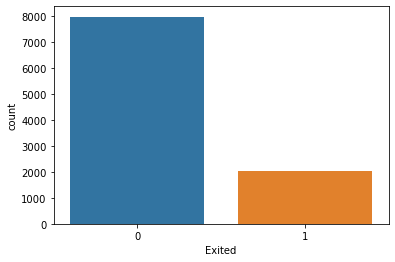

In [17]:
sns.countplot(df['Exited'])

In [18]:
x = df.drop('Exited',axis=1)
y = df['Exited']

In [19]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [20]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x,y)

In [22]:
y.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=101) #stratify = y

In [24]:
x.shape, x_train.shape, x_test.shape

((15926, 11), (11944, 11), (3982, 11))

In [25]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score 

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
x_train

array([[ 0.23932994, -0.19355189, -1.38831139, ..., -0.57619015,
        -0.4600052 , -0.83346575],
       [-0.79733584,  1.50975169, -1.38831139, ...,  1.73553816,
        -0.4600052 , -0.83346575],
       [-0.18624865, -0.19355189,  0.07095345, ..., -0.57619015,
        -0.4600052 , -0.83346575],
       ...,
       [-0.76459903, -0.89491218, -0.29386276, ..., -0.57619015,
        -0.4600052 ,  1.19980935],
       [ 0.05382133, -1.09530084, -1.02349518, ..., -0.57619015,
         2.17388845, -0.83346575],
       [-0.95010764,  1.10897438, -1.02349518, ...,  1.73553816,
        -0.4600052 , -0.83346575]])

In [28]:
x_test

array([[ 1.09048711, -0.09335756, -1.7531276 , ..., -0.57619015,
        -0.4600052 ,  1.19980935],
       [ 1.65792522, -0.19355189, -0.29386276, ...,  1.73553816,
        -0.4600052 ,  1.19980935],
       [-0.51361679, -0.49413487,  0.07095345, ..., -0.57619015,
        -0.4600052 ,  1.19980935],
       ...,
       [-1.10287944,  0.80839139,  1.16540209, ...,  1.73553816,
        -0.4600052 ,  1.19980935],
       [ 1.48332888, -0.09335756,  1.16540209, ..., -0.57619015,
         2.17388845, -0.83346575],
       [ 0.77403124, -0.39394054,  1.16540209, ..., -0.57619015,
        -0.4600052 , -0.83346575]])

# LogisticRegression

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [30]:
lr_pred 

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [31]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1988
           1       0.77      0.79      0.78      1994

    accuracy                           0.78      3982
   macro avg       0.78      0.78      0.78      3982
weighted avg       0.78      0.78      0.78      3982



In [32]:
cm1 = confusion_matrix(y_test,lr_pred)

Text(42.0, 0.5, 'Truth')

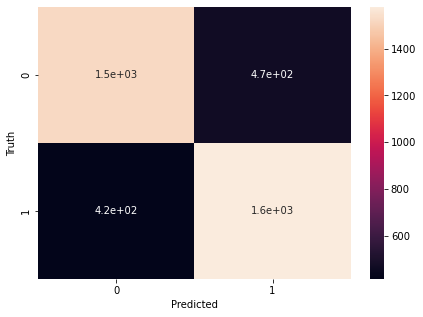

In [33]:
plt.figure(figsize=(7,5))
sns.heatmap(cm1,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
print(accuracy_score(y_test,lr_pred))

0.77850326469111


# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

In [36]:
knn_pred 

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [37]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1988
           1       0.80      0.84      0.82      1994

    accuracy                           0.81      3982
   macro avg       0.81      0.81      0.81      3982
weighted avg       0.81      0.81      0.81      3982



In [38]:
cm2 = (confusion_matrix(y_test,knn_pred))

Text(42.0, 0.5, 'Truth')

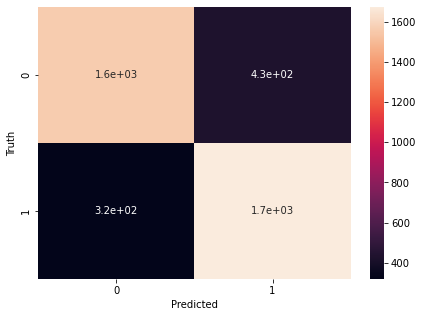

In [39]:
plt.figure(figsize=(7,5))
sns.heatmap(cm2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
print(accuracy_score(y_test,knn_pred))

0.8126569563033651


In [41]:
#score = []

#for k in range(1,40):
    #knn=KNeighborsClassifier(n_neighbors=k)
    #knn.fit(x_train,y_train)
    #knn_pred=knn.predict(x_test)
    #score.append(accuracy_score(y_test,knn_pred))
    #score

# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state=1)
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)

In [43]:
dtc_pred 

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [44]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1988
           1       0.79      0.82      0.80      1994

    accuracy                           0.80      3982
   macro avg       0.80      0.80      0.80      3982
weighted avg       0.80      0.80      0.80      3982



In [45]:
cm3 = confusion_matrix(y_test,dtc_pred)

Text(42.0, 0.5, 'Truth')

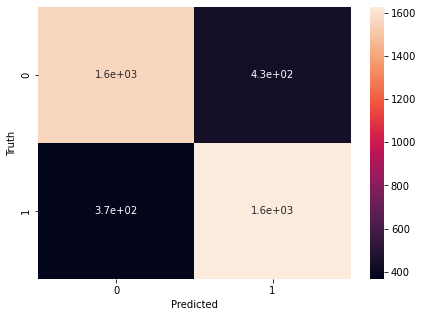

In [46]:
plt.figure(figsize=(7,5))
sns.heatmap(cm3,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
print(accuracy_score(y_test,dtc_pred))

0.7985936715218483


# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)

In [49]:
rfc_pred 

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [50]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1988
           1       0.84      0.81      0.83      1994

    accuracy                           0.83      3982
   macro avg       0.83      0.83      0.83      3982
weighted avg       0.83      0.83      0.83      3982



In [51]:
cm4 = confusion_matrix(y_test,rfc_pred)

Text(42.0, 0.5, 'Truth')

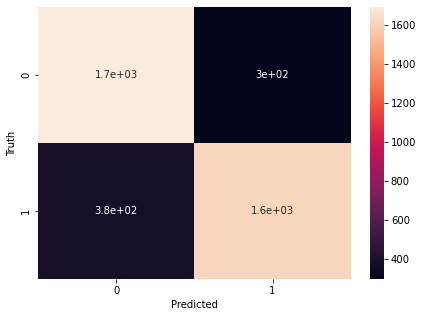

In [52]:
plt.figure(figsize=(7,5))
sns.heatmap(cm4,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
print(accuracy_score(y_test,rfc_pred))

0.82898041185334


# SVM

In [54]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)

In [55]:
svc_pred 

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [56]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1988
           1       0.82      0.82      0.82      1994

    accuracy                           0.82      3982
   macro avg       0.82      0.82      0.82      3982
weighted avg       0.82      0.82      0.82      3982



In [57]:
cm5 = confusion_matrix(y_test,svc_pred)

Text(42.0, 0.5, 'Truth')

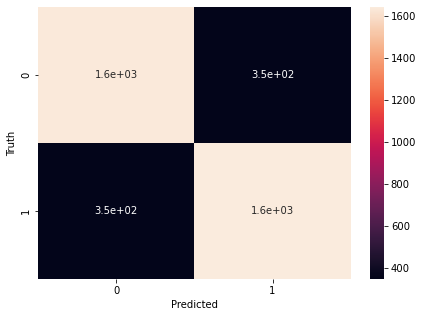

In [58]:
plt.figure(figsize=(7,5))
sns.heatmap(cm5,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
print(accuracy_score(y_test,svc_pred))

0.8239578101456555


# XGBoost

In [60]:
from xgboost import XGBClassifier
xb = XGBClassifier()
xb.fit(x_train,y_train)
xb_pred = xb.predict(x_test)

In [61]:
xb_pred 

array([1, 1, 1, ..., 1, 0, 1])

In [62]:
print(classification_report(y_test,xb_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1988
           1       0.85      0.86      0.85      1994

    accuracy                           0.85      3982
   macro avg       0.85      0.85      0.85      3982
weighted avg       0.85      0.85      0.85      3982



In [63]:
cm6 = confusion_matrix(y_test,xb_pred)

Text(42.0, 0.5, 'Truth')

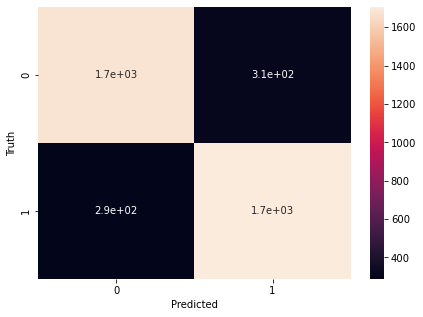

In [64]:
plt.figure(figsize=(7,5))
sns.heatmap(cm6,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
print(accuracy_score(y_test,xb_pred))

0.8493219487694625


# AdaBoost

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(x_train,y_train)
ab_pred = ab.predict(x_test)

In [67]:
ab_pred 

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [68]:
print(classification_report(y_test,ab_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1988
           1       0.80      0.83      0.82      1994

    accuracy                           0.81      3982
   macro avg       0.81      0.81      0.81      3982
weighted avg       0.81      0.81      0.81      3982



In [69]:
cm7 = confusion_matrix(y_test,ab_pred)

Text(42.0, 0.5, 'Truth')

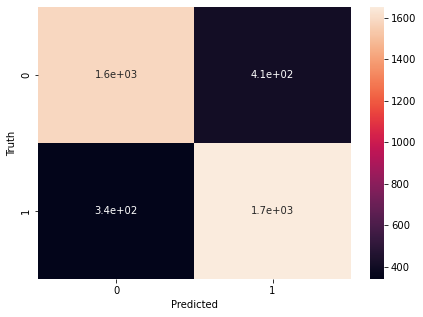

In [70]:
plt.figure(figsize=(7,5))
sns.heatmap(cm7,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [71]:
print(accuracy_score(y_test,ab_pred))

0.8121546961325967


# GradientBoosting

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)

In [73]:
gb_pred 

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [74]:
CM8 = confusion_matrix(y_test,gb_pred)

Text(42.0, 0.5, 'Truth')

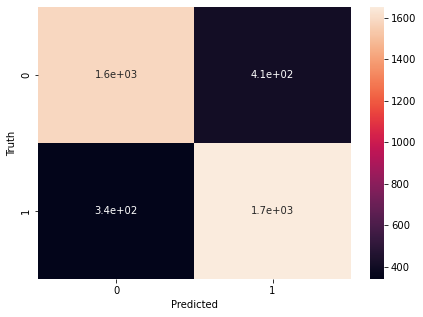

In [75]:
plt.figure(figsize=(7,5))
sns.heatmap(cm7,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1988
           1       0.82      0.82      0.82      1994

    accuracy                           0.82      3982
   macro avg       0.82      0.82      0.82      3982
weighted avg       0.82      0.82      0.82      3982



In [77]:
print(accuracy_score(y_test,gb_pred))

0.8221998995479658


In [78]:
final_data = pd.DataFrame({'Model':['LR','KNN','DT','RF','SVM','XB','AB','GB'],
                          'Accuracy':[accuracy_score(y_test,lr_pred),
                                     accuracy_score(y_test,knn_pred),
                                     accuracy_score(y_test,dtc_pred),
                                     accuracy_score(y_test,rfc_pred),
                                     accuracy_score(y_test,svc_pred),
                                     accuracy_score(y_test,xb_pred),
                                     accuracy_score(y_test,ab_pred),
                                     accuracy_score(y_test,gb_pred)]})

In [79]:
final_data

,Model,Accuracy
0,LR,0.778503
1,KNN,0.812657
2,DT,0.798594
3,RF,0.828980
4,SVM,0.823958
5,XB,0.849322
6,AB,0.812155
7,GB,0.822200


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

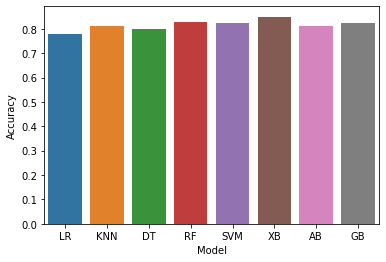

In [80]:
sns.barplot(final_data['Model'],final_data['Accuracy'])

# Joblib

In [81]:
new_customer = ([[619,42,2,0.000000,1,1,1,101348.880000,0,0,0]])

In [82]:
import joblib

In [83]:
joblib.dump(rfc,'model_joblib_heart')

['model_joblib_heart']

In [84]:
model = joblib.load('model_joblib_heart')

In [85]:
model.predict(new_customer)

array([0], dtype=int64)